In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
path = '../../data/raw/creditcard.csv'
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(df['Amount'].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


/var/folders/_9/whf73_hs0cv6l49qrnr5w4_00000gp/T/ipykernel_50372/2185596088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['V3'])


<Axes: xlabel='V3', ylabel='Density'>

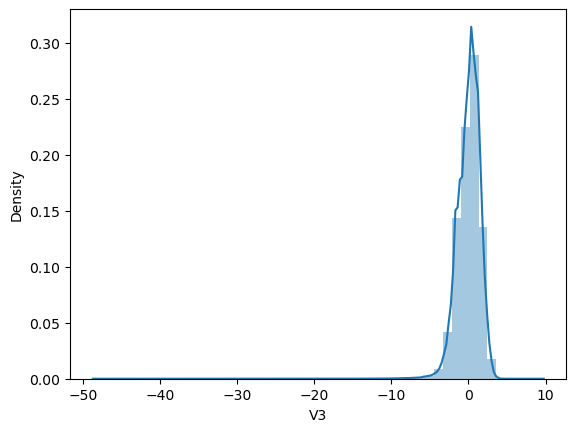

In [6]:
sns.distplot(df['V3'])

### Check missing data

In [7]:
total = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
# pd.concat([total,percentage], axis=1, keys=['total','percentage']).transpose()
print(df.isnull().sum().max())


0


### Imbalanced Data

In [8]:
temp = df['Class'].value_counts()
df_class = pd.DataFrame({'Class':temp.index, 'Value':temp.values})
normal=df_class.loc[0,'Value']
fraud=df_class.loc[1,'Value']
print(f'{fraud/(normal+fraud)*100 : .2f}% is fraudulent transaction ({fraud})')

 0.17% is fraudulent transaction (492)


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

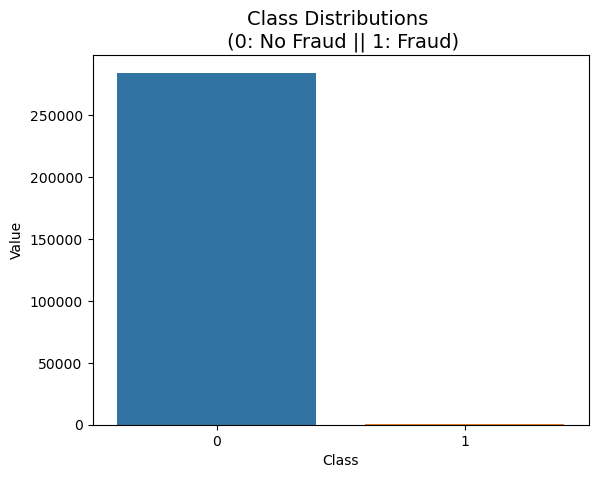

In [9]:
sns.barplot(df_class, x='Class', y='Value')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

/var/folders/_9/whf73_hs0cv6l49qrnr5w4_00000gp/T/ipykernel_50372/973165063.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
/var/folders/_9/whf73_hs0cv6l49qrnr5w4_00000gp/T/ipykernel_50372/973165063.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val,

Text(0.5, 1.0, 'Distribution of Transaction Time')

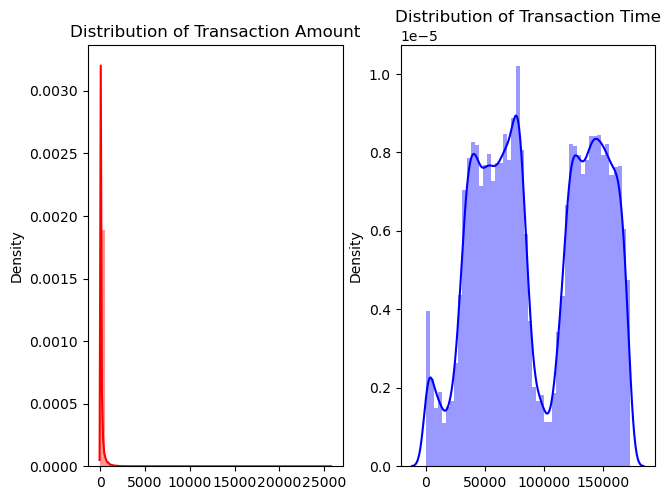

In [10]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
amount_val = df['Amount'].values
time_val = df['Time'].values
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount')
sns.distplot(time_val,ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time')


In [11]:
'''
Scaling and Sampling
Scaling: need to scale columns 'Time' and 'Amount' just like other PCA columns 'V1', etc
Sampling: create sub-sample of dataframe to have balanced classes of normal and fraud
'''

"\nScaling and Sampling\nScaling: need to scale columns 'Time' and 'Amount' just like other PCA columns 'V1', etc\nSampling: create sub-sample of dataframe to have balanced classes of normal and fraud\n"

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount','Time'],axis=1,inplace=True)


In [ ]:
# def check_skewed(self, input_df: pd.DataFrame) -> matplotlib.figure.Figure:
#     """
#     Checking if dataframe is skewed distributin

#     Parameters
#     ----------
#     input_df: pd.DataFrame

#     Return
#     ------
#     matplotlib.figure.Figure
#     """
#     var = input_df.columns

#     with plt.style.context("dark_background"):
#         _, axes = plt.subplots(10, 3, figsize=(10, 15), facecolor="m")
#         axes = axes.flatten()

#         for i, ax in enumerate(axes):
#             if i < len(var):
#                 sns.histplot(input_df[var[i]], ax=ax)
#                 ax.set_title(var[i], fontsize=20)
#                 ax.set_ylabel("Count", fontsize=20)  # set ylabel of the subplot
#                 ax.tick_params(axis="both", labelsize=15)
#                 ax.set_xlabel("")  # set empty string as x label of the subplot

#         plt.tight_layout()
#         plt.show()

# def check_imbalanced(self, input_df: pd.DataFrame) -> matplotlib.figure.Figure:
#     """
#     Printing out Imbalanced Class dataset

#     Parameters
#     ----------
#     input_df: pandas dataframe

#     Returns
#     -------
#     bar plot
#     """
#     temp = input_df["Class"].value_counts()
#     df_class = pd.DataFrame({"Class": temp.index, "Value": temp.values})
#     normal_num = df_class.loc[0, "Value"]
#     fraud_num = df_class.loc[1, "Value"]
#     print(
#         f"Class 0: {normal_num/(normal_num+fraud_num)*100 : .2f}% \
#         is normal transaction ({normal_num})"
#     )
#     print(
#         f"Class 1: {fraud_num/(normal_num+fraud_num)*100 : .2f}% \
#         is fraudulent transaction ({fraud_num})"
#     )
#     sns.barplot(x="Class", y="Value", data=df_class)
#     plt.title("Class Distributions \n (0: No Fraud 1: Fraud)")




In [13]:
'''
Splitting the data
: Goal is to fit the model with undersampled or oversampled data to avoid biased prediction from training. 
But we have to test on original data(imbalanced one).
'''

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, StratifiedShuffleSplit

X = df.drop('Class',axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for i, (train_idx, test_idx) in enumerate(sss.split(X,y)):
    print(len(train_idx))
    original_Xtrain, original_Xtest = X.iloc[train_idx], X.iloc[test_idx]
    original_ytrain, original_ytest = y.iloc[train_idx], y.iloc[test_idx]
    

227845
227845
227846
227846
227846


In [14]:
'''
Random Under-Sampling
: Removes data to have balanced dataset
'''

df_sample = df.sample(frac=1)
fraud_df = df_sample.loc[df_sample['Class']==1]
non_fraud_df = df_sample.loc[df_sample['Class']==0].sample(n=492)
new_df = pd.concat([fraud_df,non_fraud_df]).sample(frac=1,random_state=42)


Class
0    0.5
1    0.5
Name: count, dtype: float64


<Axes: xlabel='Class', ylabel='count'>

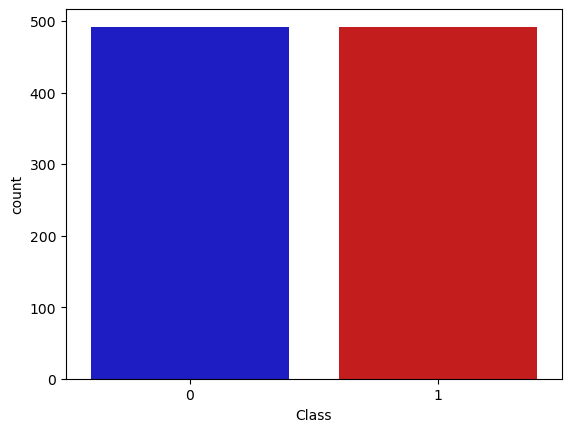

In [15]:
colors = ["#0101DF", "#DF0101"]
print(new_df['Class'].value_counts()/len(new_df))
sns.countplot(data=new_df, palette=colors, x='Class')

### Correlation Matrix

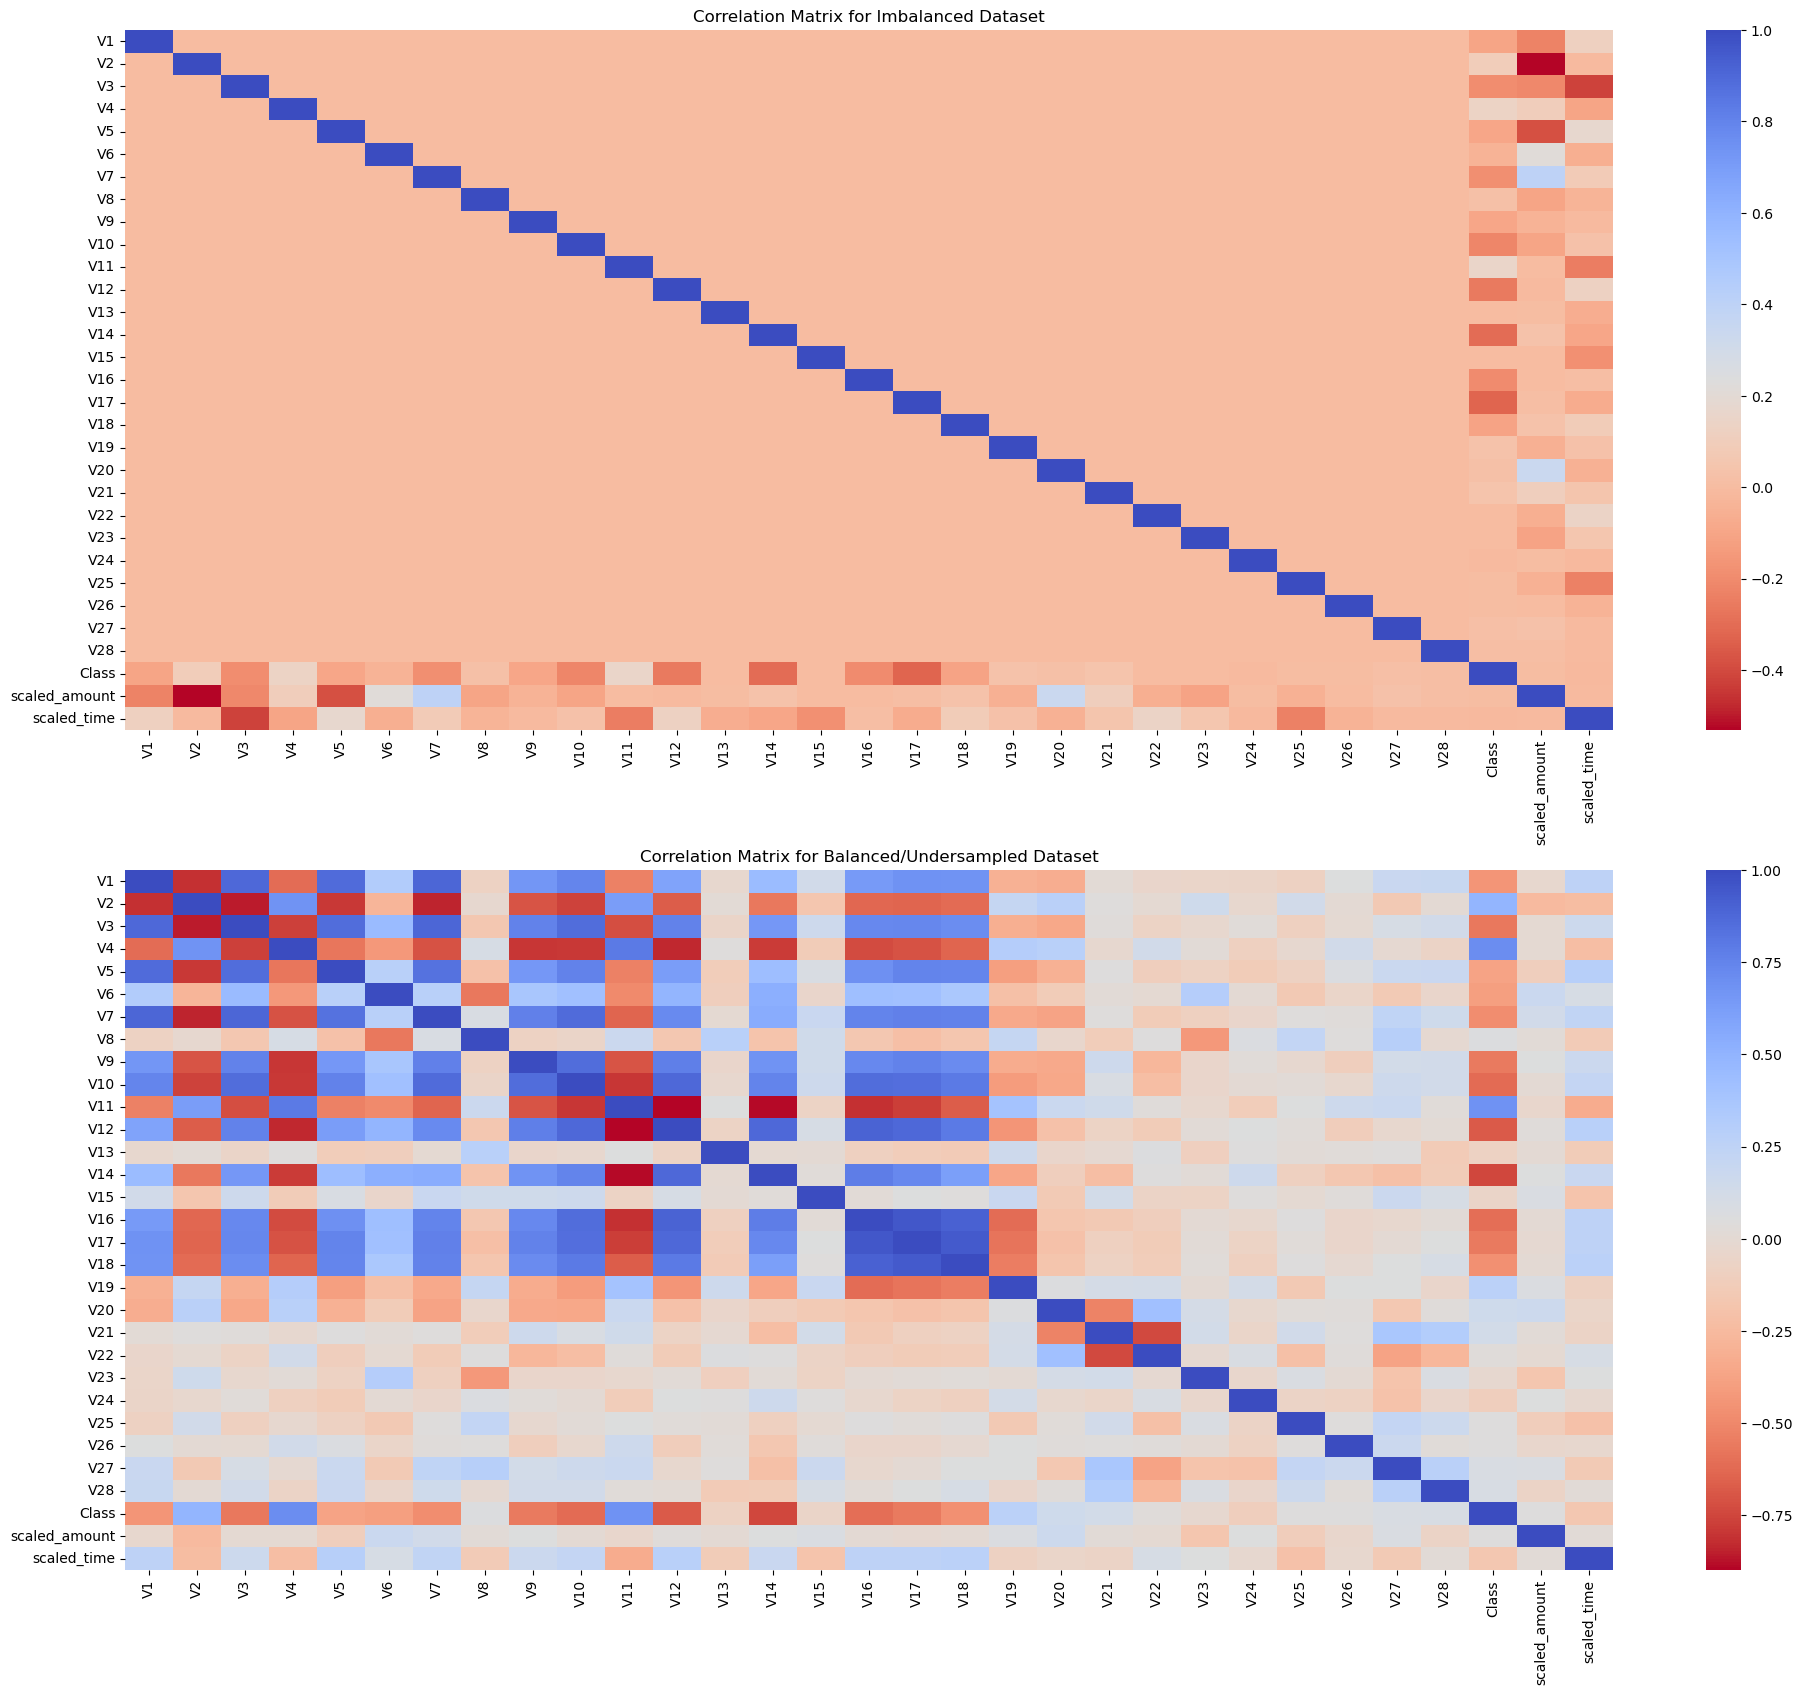

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(24,20))

corr = df_sample.corr()
sns.heatmap(corr, cmap='coolwarm_r',ax=ax1)
ax1.set_title('Correlation Matrix for Imbalanced Dataset')


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r',ax=ax2)

ax2.set_title('Correlation Matrix for Balanced/Undersampled Dataset')
plt.show()

In [17]:
corr_df = sub_sample_corr['Class'].abs()
keep_cols = corr_df.loc[corr_df>0.1]
drop_cols = corr_df.loc[corr_df<=0.1]
# new_df = new_df.drop(list(drop_cols.index),axis=1)


### Detecting and Treating Skewness

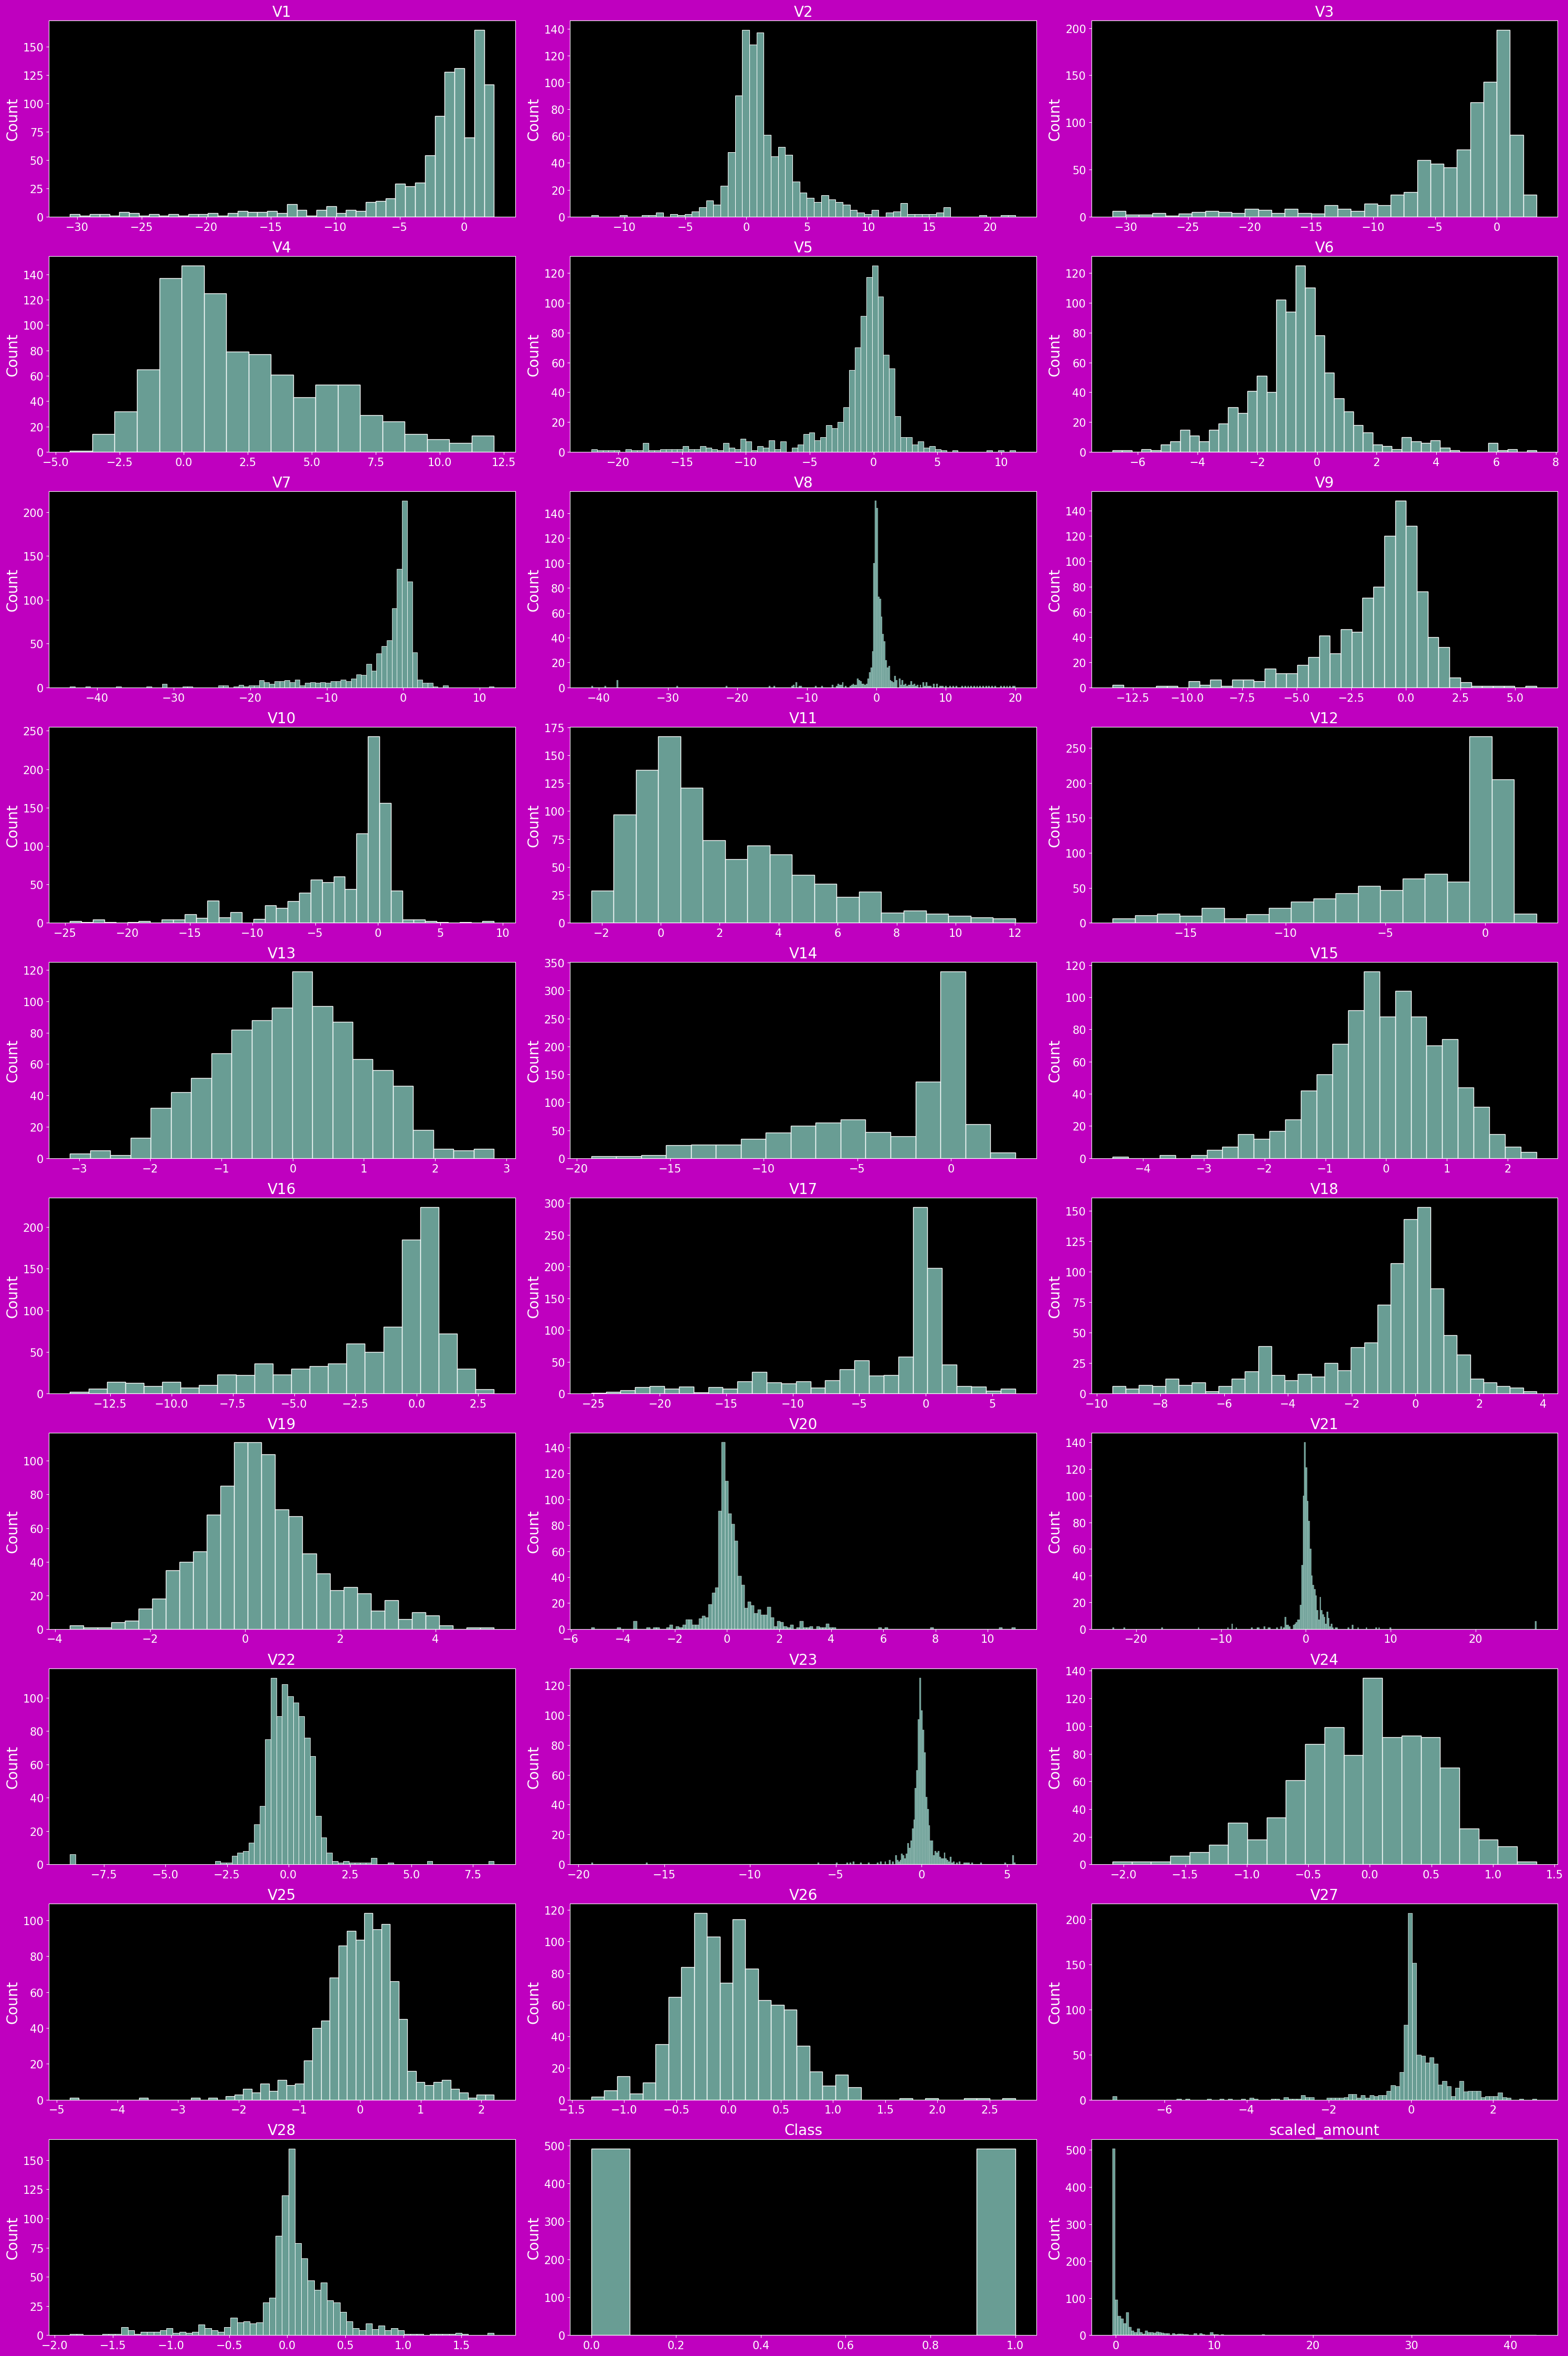

In [18]:
var = new_df.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(new_df[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20) 
            ax.set_ylabel("Count", fontsize=20)  # set ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15) 
            ax.set_xlabel('') # set empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

In [24]:
skew_list = []
for i in var:
    skew_list.append(new_df[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-2.940696
V2,1.535641
V3,-2.465084
V4,0.821774
V5,-2.546035
V6,0.463713
V7,-2.178957
V8,-3.458166
V9,-1.099676


In [25]:
# Filtering the features which has skewness less than -1 and greater than +1
"""
This is a good way to identify which features may need to be transformed to improve model performance.
"""
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V16',
 'V17',
 'V18',
 'V21',
 'V22',
 'V23',
 'scaled_amount']

### Anomaly Detection

/var/folders/_9/whf73_hs0cv6l49qrnr5w4_00000gp/T/ipykernel_50372/3538466111.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
/var/folders/_9/whf73_hs0cv6l49qrnr5w4_00000gp/T/ipykernel_50372/3538466111.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

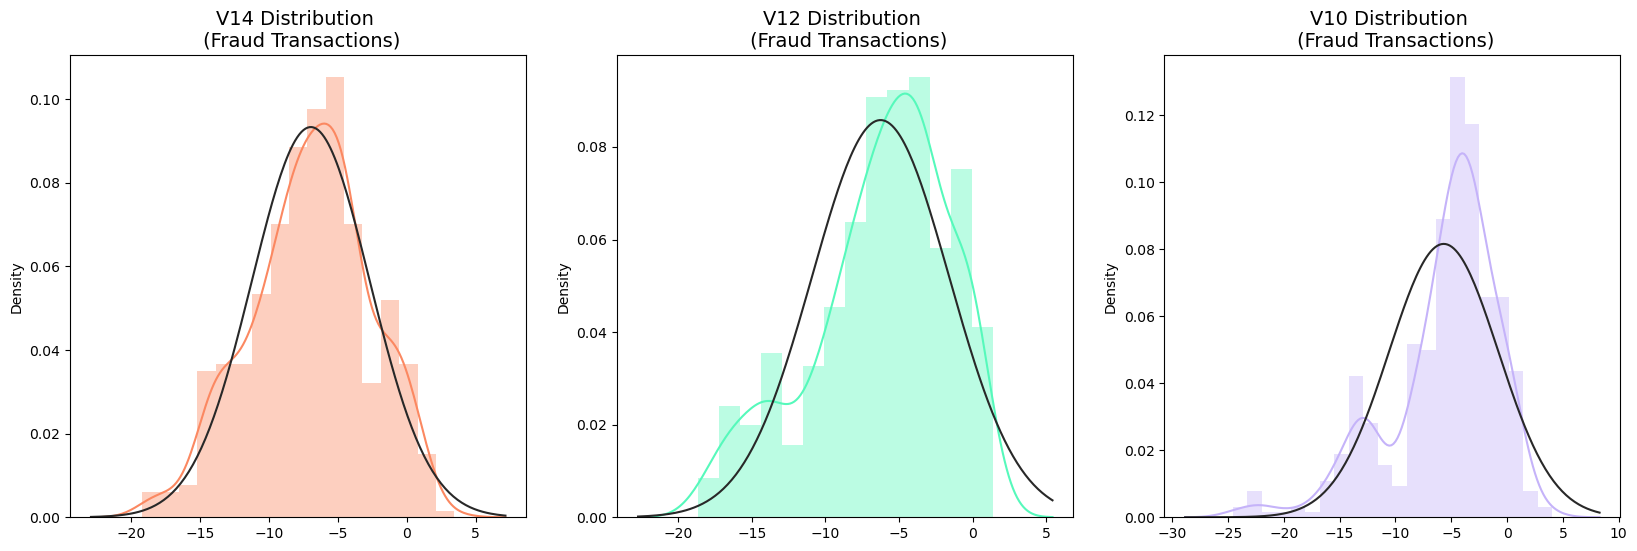

In [19]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [20]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.4937733551053, -18.8220867423816, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.6837146333443, -18.0475965708216, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.2318333653018, -23.228254

### Dimensionality Reduction & Clustering

In [21]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = new_df.drop('Class',axis=1)
y = new_df['Class']

In [22]:
X_tsne = TSNE(n_components=2,random_state=42).fit_transform(X.values)
X_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
X_svd = TruncatedSVD(n_components=2, algorithm='randomized',random_state=42).fit_transform(X.values)

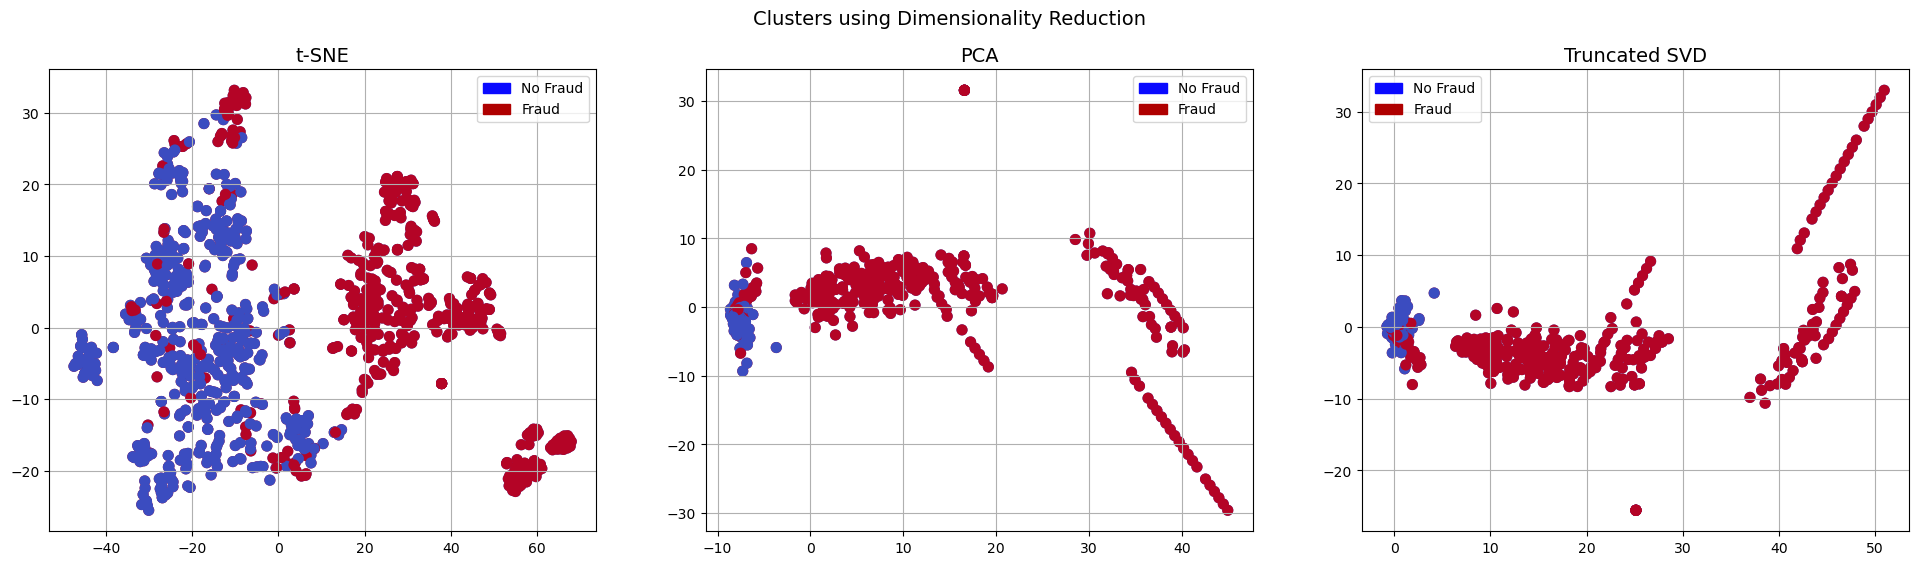

In [23]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_pca[:,0], X_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_pca[:,0], X_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_svd[:,0], X_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_svd[:,0], X_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)


ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()
